# 5章 安定性

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'cm' # math fontの設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.5 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'it'#'regular'
plt.rcParams['axes.xmargin'] = '0'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

plt.rcParams["legend.fancybox"] = True     # 丸角
# plt.rcParams["legend.framealpha"] = 1    # 透明度の指定、0で塗りつぶしなし
# plt.rcParams["legend.edgecolor"] = 'gray' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1.8  # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.4  # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.7 # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1.0   # 点がある場合のmarker scale

In [2]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [3]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':', lw=0.5)
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [4]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':', lw=0.5)
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':', lw=0.5)
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

In [5]:
# 図を保存するかどうか
is_savefig = False
# 図の保存パス
figpath="./notebook_output/"  

In [6]:
# 数式処理のためにsympyをインポート
import sympy as sp
from sympy.matrices import *

### 例5.1: 伝達関数と状態方程式の安定性の関係

状態方程式を定義

In [7]:
A = np.matrix([[4,3],[-6,-5]])
B = np.matrix([[0],[1]])
C1 = np.matrix([1,0])
C2 = np.matrix([1,1])
D = np.matrix([0])
ss1 = ss(A, B, C1, D)
ss2 = ss(A, B, C2, D)

In [8]:
ss1

StateSpace(array([[ 4.,  3.],
       [-6., -5.]]), array([[0.],
       [1.]]), array([[1., 0.]]), array([[0.]]))

In [9]:
ss2

StateSpace(array([[ 4.,  3.],
       [-6., -5.]]), array([[0.],
       [1.]]), array([[1., 1.]]), array([[0.]]))

Aの固有値を調べてみると1と-2で，正のものを一つ含むので不安定である．

In [10]:
l, _ = np.linalg.eig(A)
l

array([ 1., -2.])

一方，伝達関数を調べてみると，G1の極はAの固有値を二つとも保存しているが，G2の極は安定な固有値の方しか含まない．Aの不安定極は，出力行列C2によって隠されてしまっている．

In [11]:
G1 = ss2tf(ss1)
G1

TransferFunction(array([3.]), array([ 1.,  1., -2.]))

In [12]:
pole(G1)

array([-2.,  1.])

In [13]:
G2 = ss2tf(ss2)
G2

TransferFunction(array([1.]), array([1., 2.]))

In [14]:
pole(G2)

array([-2.])

### コーヒーブレイク：安定性の用語に注意

積分器を含むシステム＝原点に極を持つ場合の挙動

In [15]:
G1=tf([1],[1,1,0])
G1

TransferFunction(array([1]), array([1, 1, 0]))

In [16]:
pole(G1)

array([-1.,  0.])

In [17]:
ss1 = tf2ss(G1)
ss1

StateSpace(array([[-1.,  0.],
       [ 1.,  0.]]), array([[-1.],
       [ 0.]]), array([[ 0., -1.]]), array([[0.]]))

In [18]:
s, v = np.linalg.eig(ss1.A)
s

array([ 0., -1.])

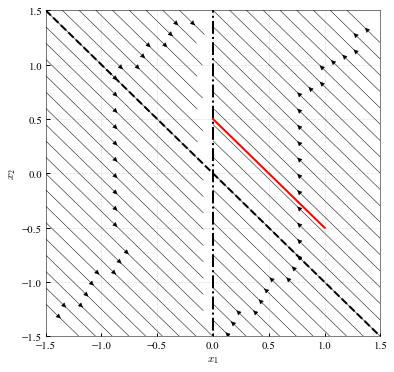

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))

w = 1.5
Y, X = np.mgrid[-w:w:5j, -w:w:5j]

U = ss1.A[0,0]*X + ss1.A[0,1]*Y
V = ss1.A[1,0]*X + ss1.A[1,1]*Y

# 固有空間のプロット
vv = v * w * np.sqrt(2)
if s.imag[0] == 0 and s.imag[1] == 0: #固有値が複素数の場合はプロットできない
    ax.plot([-vv[0,0],vv[0,0]], [-vv[1,0],vv[1,0]], c='k', ls='-.', lw=2)
    ax.plot([-vv[0,1],vv[0,1]], [-vv[1,1],vv[1,1]], c='k', ls='--', lw=2)    
    
ax.streamplot(X, Y, U, V, density=0.7, color='k', linewidth=0.5)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_xticks(np.arange(-1.5, 1.51, step=0.5))
ax.set_yticks(np.arange(-1.5, 1.51, step=0.5))
ax.grid(ls = ':')
plot_set(ax, '$x_1$', '$x_2$')

_, _, x = initial(ss1, X0=[1,-0.5], return_x=True)
ax.plot(x[:,0], x[:,1], lw=2, color='r',)     

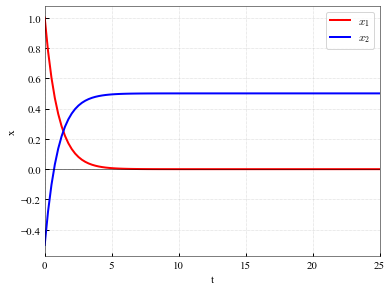

In [20]:
fig, ax = plt.subplots(figsize=(6, 4.6))

x0 = [1,-0.5]

_, trange, x = initial(ss1, X0=x0, return_x=True)     # シミュレーション
ax.plot(trange, x[:,0], lw=2, color='r', label='$x_1$')                    
ax.plot(trange, x[:,1], lw=2, color='b', label='$x_2$')                    

ax.axhline(0, color="k", linewidth=0.5)  
ax.grid(ls = ':')
plot_set(ax,'t','x','best')

### 例5.2 Lyapunovの安定判別法

In [21]:
A = np.matrix([[1, 2],[-3, -4]])
B =  np.matrix([[0],[1]])
C =  np.matrix([1, 0])
D =  np.matrix([0])
sys = ss(A, B, C, D)
print(sys)

A = [[ 1.  2.]
     [-3. -4.]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]



In [22]:
Q = np.eye(A.shape[0])*12
Q

array([[12.,  0.],
       [ 0., 12.]])

In [23]:
#関数の仕様上，A^Tを代入していることに注意
P = lyap(np.transpose(A),Q)
print(P)

[[27. 11.]
 [11.  7.]]


In [24]:
P*A + np.transpose(A)*P

matrix([[-1.20000000e+01, -3.55271368e-15],
        [-3.55271368e-15, -1.20000000e+01]])

固有値の確認

In [25]:
l, v = np.linalg.eig(A)
l

array([-1., -2.])

※数式処理による理論解

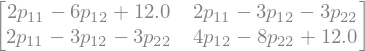

In [26]:
import sympy
sympy.init_printing()
sympy.var('p11, p12, p22')
Asym=sympy.Matrix(A)
Psym=sympy.Matrix([[p11, p12],[p12, p22]])
Qsym=sympy.Matrix(Q)
Lyap = Psym*Asym + Asym.transpose()*Psym + Qsym
Lyap

In [27]:
eq1 = sympy.Eq(Lyap[0,0], 0)
eq2 = sympy.Eq(Lyap[0,1], 0)
eq3 = sympy.Eq(Lyap[1,1], 0)
sympy.solve([eq1, eq2, eq3], [p11, p12, p22])

章末問題【２】も参照のこと．

### 例5.3 フィードバック系の内部安定性と極零相殺

数式処理による理論解析

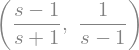

In [28]:
s=sp.symbols('s')
K=(s-1)/(s+1)
P=1/(s-1)
K,P

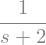

In [29]:
Gyr=sp.factor(P*K/(1+P*K))
Gyr

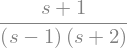

In [30]:
Gyd=sp.factor(P/(1+P*K))
Gyd #不安定！

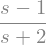

In [31]:
Gur=sp.factor(K/(1+P*K))
Gur

章末問題【３】も参照のこと．

### 例5.4(a) L(s)が積分器を持つ場合

In [32]:
L=tf([1],[1,0]) * tf([1],[1,1])**3

Text(0.2, 0, '$O$')

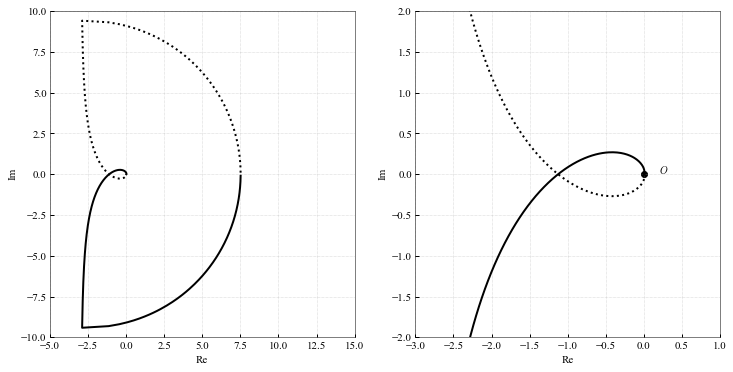

In [33]:
# 全体図(左)，拡大図（右）
fig, ax = plt.subplots(1,2,figsize=(12, 6)) 

x, y, _ = nyquist(L, logspace(-3,3,1000), plot=False)

for i in [0,1]:
    ax[i].plot(x, y, c='k', ls='-', lw=2)
    ax[i].plot(x, -y, c='k', ls=':', lw=2)

    ax[i].grid(ls=':', lw=0.5)
    ax[i].set_xlabel('Re')
    ax[i].set_ylabel('Im')
    
ax[0].set_xlim(-5,15)
ax[0].set_ylim(-10, 10)
ax[1].set_xlim(-3,1)
ax[1].set_ylim(-2,2)

ax[1].scatter(0, 0, color='k')
ax[1].annotate('$O$', xy=(0.2, 0), size=10)

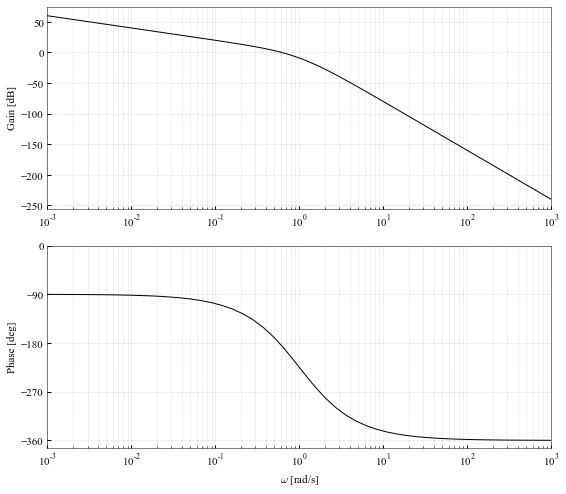

In [34]:
# Bode線図（参考）
fig, ax = plt.subplots(2, 1, figsize=(8,7)) 

gain, phase, w = bode(L, logspace(-3,3), plot=False)
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=1)
ax[1].semilogx(w, phase*180/np.pi, color='k', lw=1)

bodeplot_set(ax)

ax[1].set_yticks([-360,-270,-180,-90,0])

fig.tight_layout()

### L(s)が虚軸上に極を持つ場合

In [35]:
omega = 10.0
L=tf([omega],[1,0,omega**2]) * tf([1],[1,1])

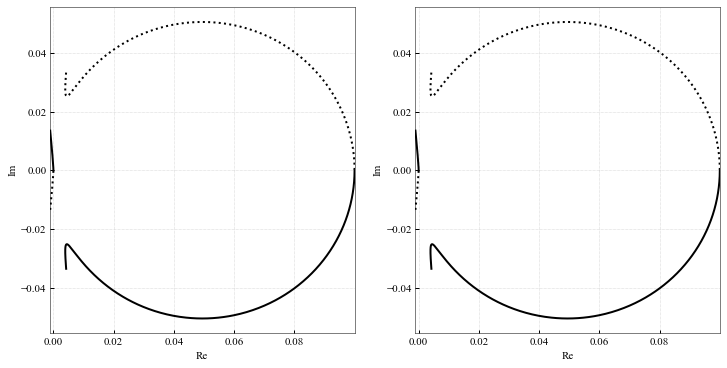

In [36]:
# 全体図(左)，拡大図（右）
fig, ax = plt.subplots(1,2,figsize=(12, 6)) 

log_eps = 0.1
x, y, _ = nyquist(L, logspace(-3, 1-log_eps,1000), plot=False)
x2, y2, _ = nyquist(L, logspace(1+log_eps,3,1000), plot=False)

for i in [0,1]:
    ax[i].plot(x, y, c='k', ls='-', lw=2)
    ax[i].plot(x, -y, c='k', ls=':', lw=2)
    ax[i].plot(x2, y2, c='k', ls='-', lw=2)
    ax[i].plot(x2, -y2, c='k', ls=':', lw=2)

    
    ax[i].grid(ls=':', lw=0.5)
    ax[i].set_xlabel('Re')
    ax[i].set_ylabel('Im')
    
# ax[0].set_xlim(-5,15)
# ax[0].set_ylim(-10, 10)
# ax[1].set_xlim(-3,1)
# ax[1].set_ylim(-2,2)


/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/xferfcn.py:317: RuntimeWarning: divide by zero encountered in true_divide
  out[i][j] = (polyval(self.num[i][j], x_arr) /
/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/xferfcn.py:317: RuntimeWarning: invalid value encountered in true_divide
  out[i][j] = (polyval(self.num[i][j], x_arr) /


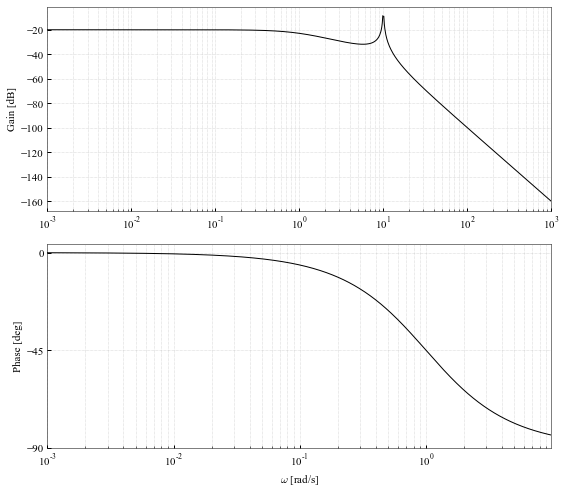

In [37]:
# Bode線図（参考）
fig, ax = plt.subplots(2, 1, figsize=(8,7)) 

gain, phase, w = bode(L, logspace(-3,3,1000), plot=False)
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=1)
ax[1].semilogx(w, phase*180/np.pi, color='k', lw=1)

bodeplot_set(ax)

ax[1].set_yticks([-90,-45,0])

fig.tight_layout()

## 章末問題

### 【１】 Routh-Hurwitzの方法による安定判別

In [38]:
import sympy as sp
s = sp.symbols('s')
a3,a2,a1,a0 = sp.symbols('a_3, a_2, a_1, a_0')
# b3,b2,b1 = sp.symbols('b_3, b_2, b_1')
# c3,c2,c1 = sp.symbols('c_3, c_2, c_1')
# d3,d2,d1 = sp.symbols('d_3, d_2, d_1')
sp.init_printing()

#### (1) Routhの方法

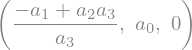

In [39]:
b1 = (a3*a2 - 1*a1) / a3
b2 = (a3*a0 - 1*0)  / a3  # 係数がないところは0を埋める
b3 = (a3* 0 - 1*0)  / a3  # 係数がないところは0を埋める
b1,b2,b3

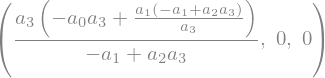

In [40]:
c1 = (b1*a1 - a3*b2) / b1
c2 = (b1*0  - a3*b3) / b1
c3 = (b1*0  - a3*0 ) / b1 
c1, c2, c3

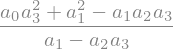

In [41]:
c1 = sp.factor(sp.expand(c1))
c1

In [42]:
d1 = (c1*b2 - b1*c2) / c1
d2 = (c1*b3 - b1*c3) / c1
d1,d2

再評価

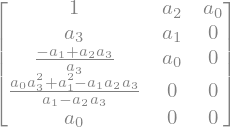

In [43]:
Routh = sp.Matrix([
    [1, a2, a0], 
    [a3, a1, 0], 
    [b1, b2, b3], 
    [c1, c2, 0], 
    [d1, d2, 0]
])  
Routh

係数を代入して確認

In [44]:
values=[(a3,2), (a2,3), (a1,4), (a0, 5)]

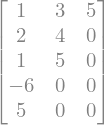

In [45]:
Routh.subs(values)

最左列をみると，２回符号が変わっているので，不安定（不安定極を二つもつ）ことがわかる．

#### (2) Hurwitzの方法

In [46]:
H4 = sp.Matrix([[a1, a3, 0, 0],[a0, a2, 1, 0],[0, a1, a3, 0], [0, a0, a2, 1]])
H3 = H4[:3,:3]
H2 = H4[:2,:2]
H1 = H4[:1,:1]

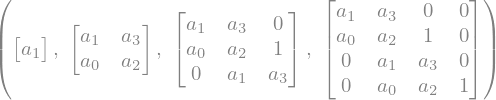

In [47]:
H1, H2, H3, H4

In [48]:
sp.det(H1), sp.det(H2), sp.det(H3), sp.det(H4)

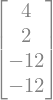

In [49]:
sp.Matrix([sp.det(H1), sp.det(H2), sp.det(H3), sp.det(H4)]).subs(values)

#### (3) 確認

In [50]:
P = tf([1],[1,2,3,4,5])
P

TransferFunction(array([1]), array([1, 2, 3, 4, 5]))

In [51]:
pole(P)

array([-1.28781548+0.85789676j, -1.28781548-0.85789676j,
        0.28781548+1.41609308j,  0.28781548-1.41609308j])

### 【２】 Lyapunovの方法による安定判別

In [52]:
A = np.matrix([[-2, 1],[2, -3]])
B =  np.matrix([[0],[1]])
C =  np.matrix([1, 0])
D =  np.matrix([0])
sys = ss(A, B, C, D)
print(sys)

A = [[-2.  1.]
     [ 2. -3.]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]



In [53]:
Q = np.eye(A.shape[0])
Q

array([[1., 0.],
       [0., 1.]])

In [54]:
#関数の仕様上，A^Tを代入していることに注意
P = lyap(np.transpose(A),Q)
P*40

matrix([[17.,  7.],
        [ 7.,  9.]])

In [55]:
P*A + np.transpose(A)*P

matrix([[-1.00000000e+00,  5.55111512e-17],
        [ 5.55111512e-17, -1.00000000e+00]])

In [56]:
l, v = np.linalg.eig(A)
l

array([-1., -4.])

※数式処理による理論解

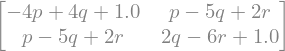

In [57]:
import sympy
sympy.init_printing()
sympy.var('p, q, r')
Asym=sympy.Matrix(A)
Psym=sympy.Matrix([[p, q],[q, r]])
Qsym=sympy.Matrix(Q)
Lyap = Psym*Asym + Asym.transpose()*Psym + Qsym
Lyap

In [58]:
eq1 = sympy.Eq(Lyap[0,0], 0)
eq2 = sympy.Eq(Lyap[0,1], 0)
eq3 = sympy.Eq(Lyap[1,1], 0)
sympy.solve([eq1, eq2, eq3], [p, q, r])

### 【３】 フィードバック系の内部安定性と極零相殺

数式処理による理論解析

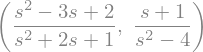

In [59]:
s=sp.symbols('s')
K=(s**2-3*s+2)/(s**2+2*s+1)
P=(s+1)/(s**2-4)
K,P

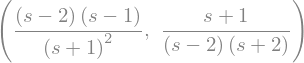

In [60]:
K=sp.factor(K)
P=sp.factor(P)
K,P

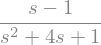

In [61]:
Gyr=sp.factor(P*K/(1+P*K))
Gyr

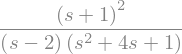

In [62]:
Gyd=sp.factor(P/(1+P*K))
Gyd

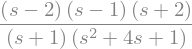

In [63]:
Gur=sp.factor(K/(1+P*K))
Gur

In [64]:
phi_FB=sp.factor(sp.denom(P)*sp.denom(K) + sp.numer(P)*sp.numer(K))
phi_FB

### 【４】 $P(s)$が安定な場合のフィードバック制御系解析


#### (1) $r$から$y$までの伝達関数$G(s)$

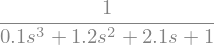

In [65]:
import sympy as sp
sp.init_printing()
s=sp.Symbol('s')
Psym= sp.expand( 1 / ((s+1)**2 * (0.1*s+1)) )
Psym

In [66]:
Ksym=sp.Symbol('k')
Ksym

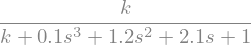

In [67]:
Gsym = sp.simplify( Psym * Ksym / (1 + Psym * Ksym) )
Gsym

#### (2) Bode線図とゲイン余裕

In [68]:
P = tf([1],[1,1])**2 * tf(1,[0.1, 1])

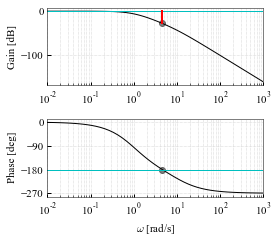

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

k=1

gain, phase, w = bode(P*k, logspace(-2,3), plot=False)
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=1)
ax[1].semilogx(w, phase*180/np.pi, color='k', lw=1)

bodeplot_set(ax)

ax[0].semilogx(w, 0*w, c='c', ls='-', lw=1)
ax[1].semilogx(w, -180*np.ones_like(w), c='c', ls='-', lw=1)
ax[1].set_yticks([-270,-180,-90,0])
# ゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数
gm, pm, wpc, wgc = margin(P*k)
GM = 20*np.log10(gm) #デシベル値に変換
ax[0].plot([wpc,wpc],[-GM,0], c='r', ls='-', lw=2)
ax[0].scatter(wpc,-GM, alpha=0.5, c='k')
ax[1].scatter(wpc,-180, alpha=0.5, c='k')

fig.tight_layout()
if (is_savefig):
    fig.savefig(figpath+"ans/ch5_4_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [70]:
20*np.log10(gm)

In [71]:
np.sqrt(21)-wpc

#### (3) Nyquist軌跡

Text(-2, 0, '$-1$')

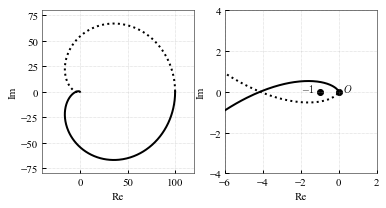

In [73]:
# 全体図(左)，拡大図（右）
fig, ax = plt.subplots(1,2,figsize=(6, 3)) 

k=100
x, y, _ = nyquist(P*k, logspace(-3,3,1000), plot=False)

for i in [0,1]:
    ax[i].plot(x, y, c='k', ls='-', lw=2)
    ax[i].plot(x, -y, c='k', ls=':', lw=2)

    ax[i].grid(ls=':', lw=0.5)
    ax[i].set_xlabel('Re')
    ax[i].set_ylabel('Im')
    
ax[0].set_xlim(-40,120)
ax[0].set_ylim(-80, 80)
ax[1].set_xlim(-6,2)
ax[1].set_ylim(-4,4)
#点0と-1
ax[1].scatter(0, 0, color='k')
ax[1].annotate('$O$', xy=(0.2, 0), size=10)
ax[1].scatter(-1, 0, color='k')
ax[1].annotate('$-1$', xy=(-2, 0), size=10)

# fig.savefig(figpath+"ans/ch5_4_nyquist.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

#### (4) 安定性解析

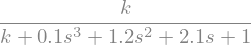

In [74]:
Gsym

Routh-Hurwitzの安定判別法によれば，３次の場合の安定性の条件は$(1+k)>0$かつ$1.2 \times 2.1 > 0.1\times (1+k)$. したがって$k$の上限は

In [75]:
Kmax = 1.2 * 2.1 / 0.1 - 1
Kmax

これは(2)で求めたゲイン余裕gmと一致している．フィードバック系が内部安定となる$k$の範囲は$0<k<24.2$である．

In [76]:
1.2*2.1

### 【５】 $P(s)$が不安定な場合のフィードバック制御系解析

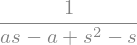

In [77]:
import sympy as sp
sp.init_printing()
s=sp.Symbol('s')
asym=sp.Symbol('a')
Psym= sp.expand( 1 / ((s-1)*(s+asym)) )
Psym

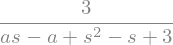

In [78]:
Gsym = sp.simplify(Psym*3 / (1+ Psym*3))
Gsym

Routh-Hurwitzの条件によれば，$a-1>0$かつ$3-a>0$，つまり$1<a<3$がフィードバック制御系が安定になるための必要十分条件である．
$a=0.8, a=2, a=4$のそれぞれの場合についてNyquist軌跡を描いてみよう．

In [79]:
a=0.5
L = 3 * tf([1],[1,-1]) *  tf(1,[1, a])

In [80]:
L

TransferFunction(array([3.]), array([ 1. , -0.5, -0.5]))

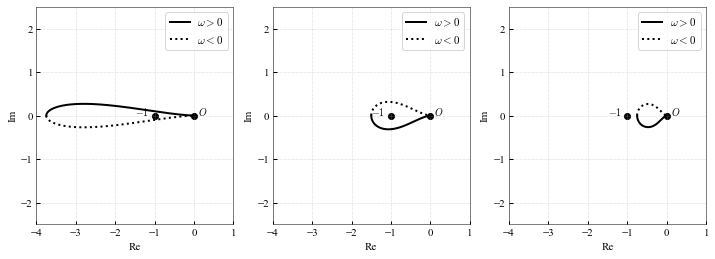

In [81]:
fig, ax = plt.subplots(1,3,figsize=(12, 4)) 

a = [0.8, 2, 4]
for i in [0, 1, 2]:
    L = 3 * tf([1],[1,-1]) *  tf(1,[1, a[i] ])
    x, y, _ = nyquist(L, logspace(-3,3,1000), plot=False)

    ax[i].plot(x, y, c='k', ls='-', lw=2, label='$\omega>0$')
    ax[i].plot(x, -y, c='k', ls=':', lw=2, label='$\omega<0$')

    ax[i].grid(ls=':', lw=0.5)
    plot_set(ax[i],'Re','Im','best')
    
    ax[i].set_xlim(-4, 1)
    ax[i].set_ylim(-2.5, 2.5)

    #点0と-1
    ax[i].scatter(0, 0, color='k')
    ax[i].annotate('$O$', xy=(0.1, 0), size=10)
    ax[i].scatter(-1, 0, color='k')
    ax[i].annotate('$-1$', xy=(-1.5, 0), size=10)
    
if (is_savefig):
    fig.savefig(figpath+"ans/ch5_5_nyquist.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)